<a href="https://colab.research.google.com/github/Danie8904/Detecci-n-Fraude/blob/main/Modelos_Capataci%C3%B3n_Retencion_Clase12_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bienvenidos al 5to cuaderno (Notebook) en Jupyter - Python**


## Analítica para Mercadeo
## Especialización en Analítica en Big Data
### Practica: Captación y Retención (Clasificación Intrusos)


# **Entendimiento del Negocio**


## Descripción:

La empresa XYZ, un proveedor de servicios de TI, enfrenta un creciente número de ataques cibernéticos dirigidos a sus sistemas y redes. Actualmente, el proceso de detección de intrusiones se realiza de manera manual y reactiva, lo que resulta en tiempos de respuesta lentos y una detección ineficiente de amenazas avanzadas.

## Problema:

Desarrollar un sistema de detección de intrusiones en redes que mejore la precisión y la velocidad de respuesta ante amenazas cibernéticas en tiempo real.

## Solución propuesta:

Implementar un modelo de aprendizaje automático basado en el conjunto de datos NSL-KDD para detectar y prevenir ataques cibernéticos en tiempo real. El modelo utilizará técnicas de clasificación y detección de anomalías para identificar patrones de comportamiento malicioso en los datos de red, como intentos de escaneo, denegación de servicio (DoS), intrusiones de tipo backdoor, entre otros.

### Referencias adicionales sobre el conjunto de datos
_M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009._


# **Conexión Drive**

In [ ]:
# Lectura de archivos en el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importar Librerias**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.model_selection import ShuffleSplit, KFold,cross_val_score, learning_curve
from sklearn.model_selection import cross_validate, ShuffleSplit
import joblib

# **Lectura de Datos**

In [ ]:
dataset = pd.read_excel("/content/drive/MyDrive/Analítica Para Mercadeo/Base de datos/KDDTrain.xlsx")
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


 # **Exploración y limpieza de los datos (EDA)**

In [ ]:
print (dataset.shape)

(125973, 42)


In [ ]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## **Revision de datos faltantes**

In [ ]:
##Identificamos el número de missing values en cada columna
dataset.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


## **Revisión de variables categoricas**

In [ ]:
# Suponiendo que tu DataFrame se llama df
dataset['protocol_type'].value_counts()

,count
protocol_type,
tcp,102689
udp,14993
icmp,8291


In [ ]:
tabla_protocol_type = pd.DataFrame({
    'Frecuencia':dataset['protocol_type'].value_counts(),
    'Porcentaje (%)': (dataset['protocol_type'].value_counts(normalize=True) * 100).round(1)
})

tabla_protocol_type

,Frecuencia,Porcentaje (%)
protocol_type,,
tcp,102689,81.5
udp,14993,11.9
icmp,8291,6.6


In [ ]:
dataset['service'].value_counts()

,count
service,
http,40338
private,21853
domain_u,9043
smtp,7313
ftp_data,6860
...,...
tftp_u,3
http_8001,2
aol,2


In [ ]:
tabla_service = pd.DataFrame({
    'Frecuencia':dataset['service'].value_counts(),
    'Porcentaje (%)': (dataset['service'].value_counts(normalize=True) * 100).round(1)
})

tabla_service

,Frecuencia,Porcentaje (%)
service,,
http,40338,32.0
private,21853,17.3
domain_u,9043,7.2
smtp,7313,5.8
ftp_data,6860,5.4
...,...,...
tftp_u,3,0.0
http_8001,2,0.0
aol,2,0.0


In [ ]:
dataset['flag'].value_counts()

,count
flag,
SF,74945
S0,34851
REJ,11233
RSTR,2421
RSTO,1562
S1,365
SH,271
S2,127
RSTOS0,103


In [ ]:
tabla_flag= pd.DataFrame({
    'Frecuencia':dataset['flag'].value_counts(),
    'Porcentaje (%)': (dataset['flag'].value_counts(normalize=True) * 100).round(1)
})

tabla_flag

,Frecuencia,Porcentaje (%)
flag,,
SF,74945,59.5
S0,34851,27.7
REJ,11233,8.9
RSTR,2421,1.9
RSTO,1562,1.2
S1,365,0.3
SH,271,0.2
S2,127,0.1
RSTOS0,103,0.1


KeyboardInterrupt: 

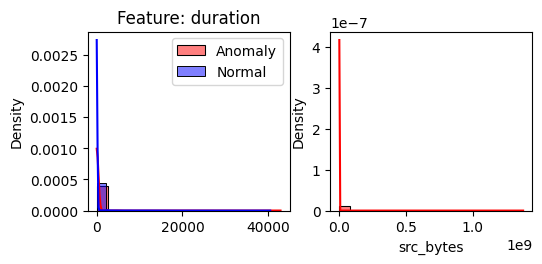

In [ ]:
import matplotlib.gridspec as gridspec

# Eliminar 'class' primero
features = dataset.drop("class", axis=1)

# Filtrar solo columnas numéricas
features = features.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 4 * (len(features.columns) // 4 + 1)))
gs = gridspec.GridSpec(len(features.columns) // 4 + 1, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features.columns):
    ax = plt.subplot(gs[i])
    sns.histplot(data=dataset[dataset["class"] == "Anomaly"], x=f, kde=True, color="red", stat="density", label="Anomaly", alpha=0.5)
    sns.histplot(data=dataset[dataset["class"] == "normal"], x=f, kde=True, color="blue", stat="density", label="Normal", alpha=0.5)
    ax.set_xlabel('')
    ax.set_title(f"Feature: {f}")
    ax.legend()

plt.tight_layout()
plt.show()

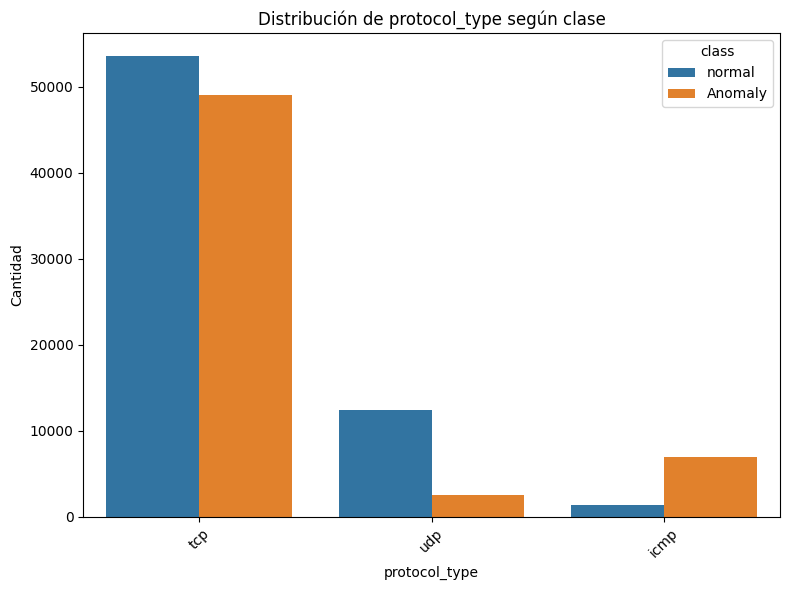

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='protocol_type', hue='class', order=dataset['protocol_type'].value_counts().index)
plt.title('Distribución de protocol_type según clase')
plt.xlabel('protocol_type')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

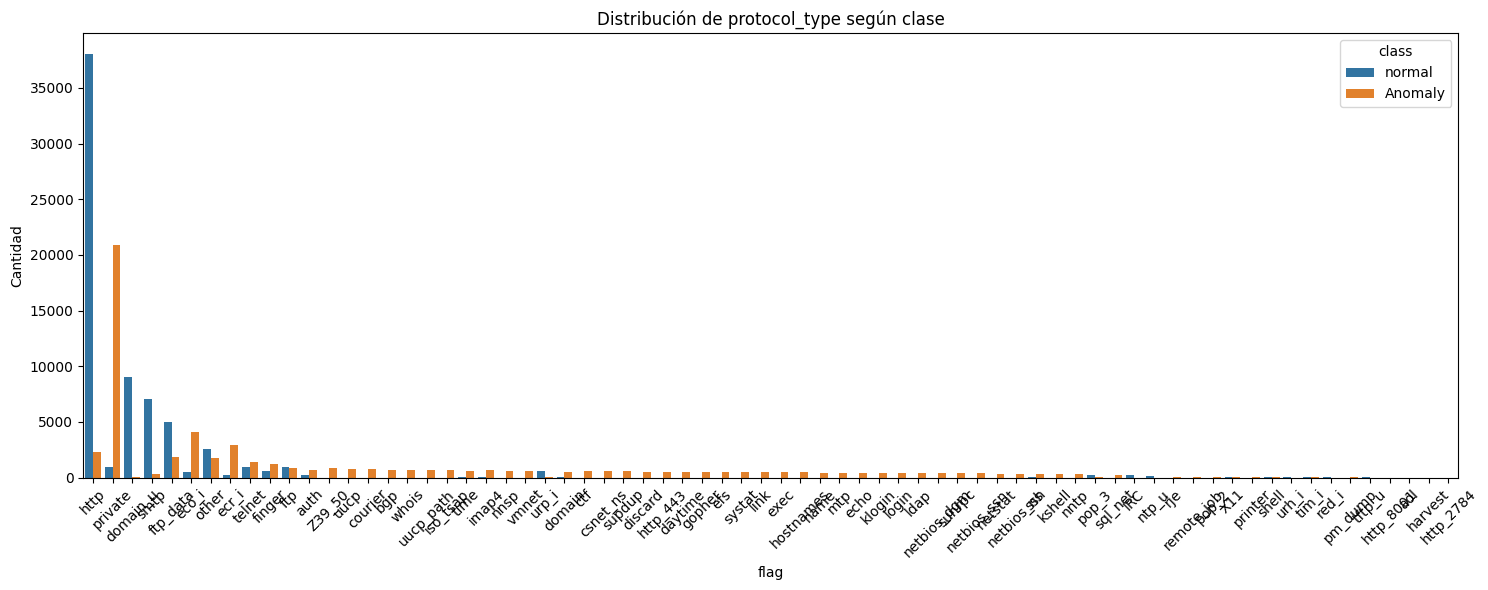

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset, x='service', hue='class', order=dataset['service'].value_counts().index)
plt.title('Distribución de protocol_type según clase')
plt.xlabel('flag')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

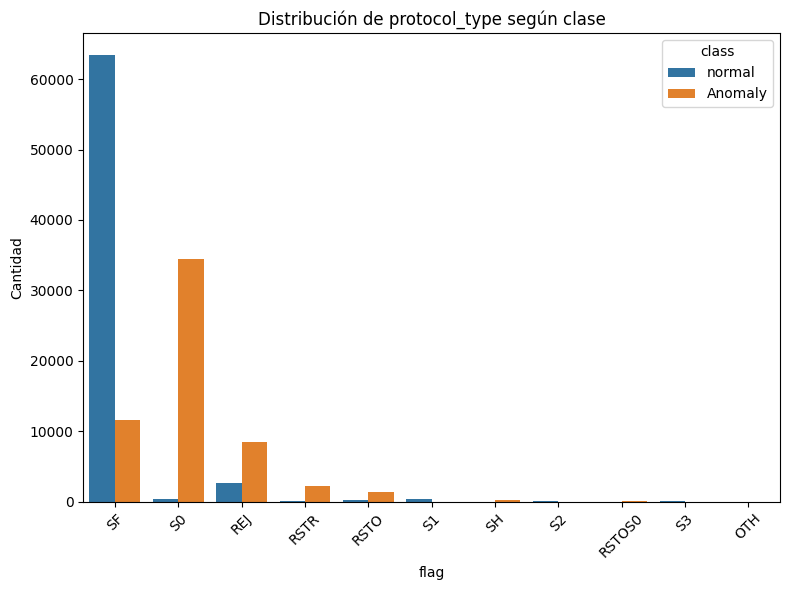

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='flag', hue='class', order=dataset['flag'].value_counts().index)
plt.title('Distribución de protocol_type según clase')
plt.xlabel('flag')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **OneHotEncoder (Variables Categoricas) y Escalar de datos (Variables númericas)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Columnas categóricas
categorical_cols = ['protocol_type', 'service', 'flag']

# Columnas numéricas
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_cols)

In [ ]:
# Variables Categoricas
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(dataset[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=dataset.index)

In [ ]:
# Variables númericas
scaler = StandardScaler()
scaled_array = scaler.fit_transform(dataset[numeric_cols])
scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=dataset.index)

In [ ]:
df_final = pd.concat([scaled_df, encoded_df], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
df_final

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.717045,-0.349683,-0.004919,-0.324063,-0.280282,-0.224532,0.069972,-0.782367,-0.639532,-0.818890,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,0.771283,-0.637209,-0.007679,-0.354343,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.620982,0.482201,-0.004919,0.734343,2.736852,-0.387635,2.367737,-1.161030,-0.639532,-1.035688,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-1.321428,-0.637209,-0.007737,-0.368110,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.339648,0.038529,-0.004919,0.734343,-0.174417,-0.387635,-0.480197,-0.938287,1.608759,-0.809857,-0.289103,-0.376387,1.618955,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-1.389669,1.602664,-0.007762,-0.299273,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.690846,-0.349683,-0.002891,-1.533670,-0.439078,-0.387635,-0.383108,1.066401,-0.572083,1.258754,0.066252,-0.345084,-0

In [ ]:
df_final['class'] = dataset['class']

In [ ]:
pd.set_option('display.max_columns', None)
df_final

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class
0,-0.717045,-0.349683,-0.004919,-0.324063,-0.280282,-0.224532,0.069972,-0.782367,-0.639532,-0.818890,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,0.771283,-0.637209,-0.007679,-0.354343,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
1,-0.620982,0.482201,-0.004919,0.734343,2.736852,-0.387635,2.367737,-1.161030,-0.639532,-1.035688,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-1.321428,-0.637209,-0.007737,-0.368110,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
2,0.339648,0.038529,-0.004919,0.734343,-0.174417,-0.387635,-0.480197,-0.938287,1.608759,-0.809857,-0.289103,-0.376387,1.618955,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-1.389669,1.602664,-0.007762,-0.299273,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Anomaly
3,-0.690846,-0.349683,-0.002891,-1.533670,-0.439078,-0.387635,-0.383108,1.066401,-0.572083,1.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 123 entries, count to class
dtypes: float64(122), object(1)
memory usage: 118.2+ MB


# **División del conjunto de datos**

In [ ]:
# Dividir los datos en conjuntos temporales (80% de los datos)
from sklearn.model_selection import train_test_split

# 1. Dividir en 80% train_val y 20% test
temp_set, test_set = train_test_split(df_final, test_size=0.2, random_state=42)

In [ ]:
# Dividir el conjunto temporal en conjuntos de entrenamiento (60% del total) y validación (20% del total)
train_set, val_set = train_test_split(temp_set, test_size=0.25, random_state=42)

In [ ]:
# Mostrar las dimensiones de cada conjunto
print("Dimensiones del conjunto de entrenamiento:", train_set.shape)
print("Dimensiones del conjunto de validación:", val_set.shape)
print("Dimensiones del conjunto de prueba:", test_set.shape)

Dimensiones del conjunto de entrenamiento: (75583, 123)
Dimensiones del conjunto de validación: (25195, 123)
Dimensiones del conjunto de prueba: (25195, 123)


In [ ]:
print("Longitud del conjunto de entrenamiento::", len(train_set))
print("Longitud del conjunto de validación:", len(val_set))
print("Longitud del conjunto de prueba:", len(test_set))

Longitud del conjunto de entrenamiento:: 75583
Longitud del conjunto de validación: 25195
Longitud del conjunto de prueba: 25195


In [ ]:
train_set.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class
112923,-0.551118,-0.349683,-0.004810,0.734343,-0.439078,-0.387635,-0.480197,1.066401,-0.639532,1.258754,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,1.235694,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,0.771283,-0.637209,-0.007725,-0.092763,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
62114,-0.114468,-0.349683,-0.004888,0.734343,-0.386146,-0.387635,-0.480197,1.066401,-0.639532,1.249721,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,0.771283,-0.637209,-0.007755,1.696994,-0.336073,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal
24430,0.636570,0.038529,-0.004919,0.734343,-0.068553,-0.387635,-0.480197,-1.027384,1.608759,-0.909222,-0.289103,-0.376387,1.618955,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-1.275934,1.602664,-0.007762,-0.175367,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Anomaly
103010,3.474796,-0.349683,-0.004919,-0.999427,-0.439078,-0.387635,2.756092,1.066401,

In [ ]:
# Conjunto de datos general
X_df = dataset.drop("class", axis=1)
y_df = dataset["class"].copy()

In [ ]:
# Conjunto de datos temp
X_temp = temp_set.drop("class", axis=1)
y_temp = temp_set["class"].copy()

In [ ]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("class", axis=1)
y_train = train_set["class"].copy()

In [ ]:
X_train

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
112923,-0.551118,-0.349683,-0.004810,0.734343,-0.439078,-0.387635,-0.480197,1.066401,-0.639532,1.258754,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,1.235694,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,0.771283,-0.637209,-0.007725,-0.092763,-0.374560,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62114,-0.114468,-0.349683,-0.004888,0.734343,-0.386146,-0.387635,-0.480197,1.066401,-0.639532,1.249721,-0.289103,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,0.771283,-0.637209,-0.007755,1.696994,-0.336073,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24430,0.636570,0.038529,-0.004919,0.734343,-0.068553,-0.387635,-0.480197,-1.027384,1.608759,-0.909222,-0.289103,-0.376387,1.618955,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-1.275934,1.602664,-0.007762,-0.175367,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103010,3.474796,-0.349683,-0.004919,-0.999427,-0.439078,-0.387635,2.756092,1.066401,-0.639532,-0.294962,-0.28910

In [ ]:
# Conjunto de datos de validación
X_val = val_set.drop("class", axis=1)
y_val = val_set["class"].copy()

In [ ]:
# Conjunto de datos de pruebas
X_test = test_set.drop("class", axis=1)
y_test = test_set["class"].copy()

# **Revisión Balance de datos**

In [ ]:
print(y_temp.value_counts())

class
normal     53921
Anomaly    46857
Name: count, dtype: int64


In [ ]:
tabla_y_temp = pd.DataFrame({
    'Frecuencia': y_temp.value_counts(),
    'Porcentaje (%)': (y_temp.value_counts(normalize=True) * 100).round(1)
})

tabla_y_temp

,Frecuencia,Porcentaje (%)
class,,
normal,53921,53.5
Anomaly,46857,46.5


<ipython-input-41-2e4d5bbbb5f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_temp, palette='Set2')


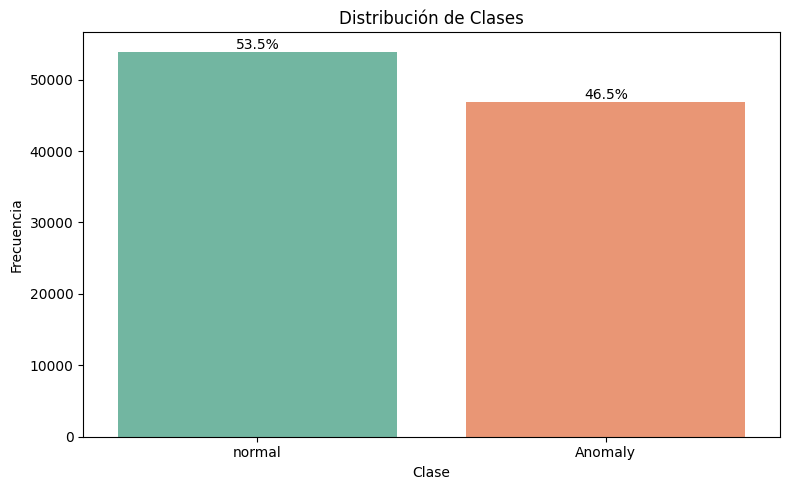

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y_temp, palette='Set2')
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

# Mostrar porcentajes encima de las barras
total = len(y_temp)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(porcentaje, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


# **Modelamiento - Regresión Logística**

## Regresión Logística (Un testeo)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_temp, y_temp)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_val)

## **Evaluación de Modelo**

In [ ]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)
print("Matriz de Confusión:\n", cm)

Matriz de Confusión:
 [[11310   419]
 [  226 13240]]


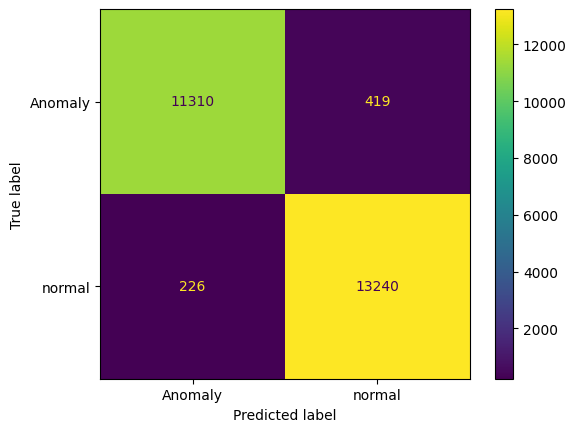

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, values_format='d')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Reporte de clasificación (precision, recall, f1, support)
print("\nReporte de Clasificación:\n", classification_report(y_val, y_pred))

# Accuracy
acc = accuracy_score(y_val, y_pred)
print("Accuracy:", acc)


Reporte de Clasificación:
               precision    recall  f1-score   support

     Anomaly       0.98      0.96      0.97     11729
      normal       0.97      0.98      0.98     13466

    accuracy                           0.97     25195
   macro avg       0.97      0.97      0.97     25195
weighted avg       0.97      0.97      0.97     25195

Accuracy: 0.9743996824766818


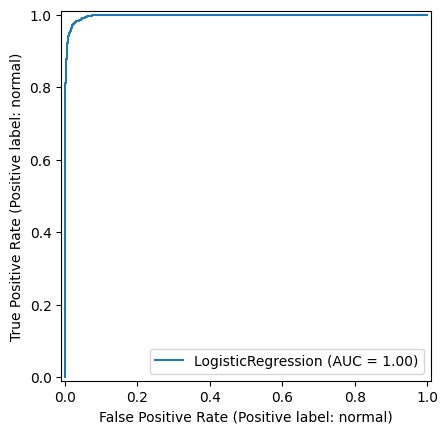

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_val, y_val)

## **Reporte al Equipo Comercial/Puesta en producción**

In [ ]:
y_pred = clf.predict(X_test)

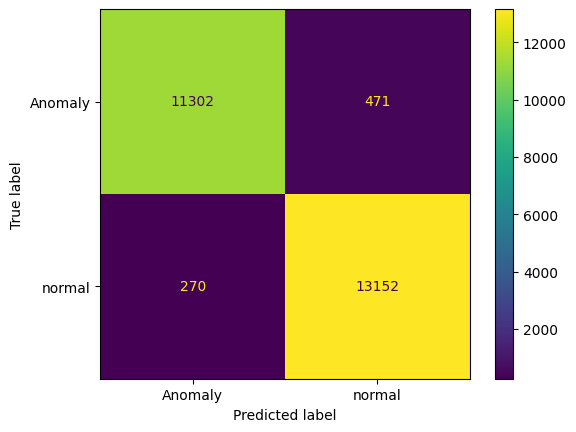

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, values_format='d')

In [ ]:
# Reporte de clasificación (precision, recall, f1, support)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Reporte de Clasificación:
               precision    recall  f1-score   support

     Anomaly       0.98      0.96      0.97     11773
      normal       0.97      0.98      0.97     13422

    accuracy                           0.97     25195
   macro avg       0.97      0.97      0.97     25195
weighted avg       0.97      0.97      0.97     25195

Accuracy: 0.9705894026592577


In [ ]:
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_test, y_pred, pos_label='Anomaly'))

F1 score: 0.9682587277789677


## **Regresión Logística + Cross Validation**

In [ ]:
estimator1 = LogisticRegression()
z1 = cross_validate(estimator1, X_temp, y_temp, return_train_score=True, return_estimator=False,
                       scoring='accuracy', cv=ShuffleSplit(n_splits=10, test_size=0.25))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Diccionario de python
z1

{'fit_time': array([4.88366914, 6.62938094, 5.8518033 , 6.27489686, 4.78217888,
        5.3571198 , 4.85401726, 4.31529927, 5.63658452, 4.35703778]),
 'score_time': array([0.16366053, 0.16476393, 0.16197205, 0.12723637, 0.14141059,
        0.17138839, 0.1233356 , 0.12420297, 0.12454867, 0.12488031]),
 'test_score': array([0.97443937, 0.97424092, 0.97253423, 0.97324866, 0.97439968,
        0.97340742, 0.97269299, 0.97261361, 0.97324866, 0.97229609]),
 'train_score': array([0.97326118, 0.97339349, 0.97368456, 0.97347287, 0.97293042,
        0.9730495 , 0.97376394, 0.97353902, 0.97297011, 0.9739624 ])}

In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) con %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) con %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))

report_cv_score(z1)

test score   0.973 (±0.0008) con 10 splits
train score  0.973 (±0.0003) con 10 splits


# **Curvas de Aprendizaje**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

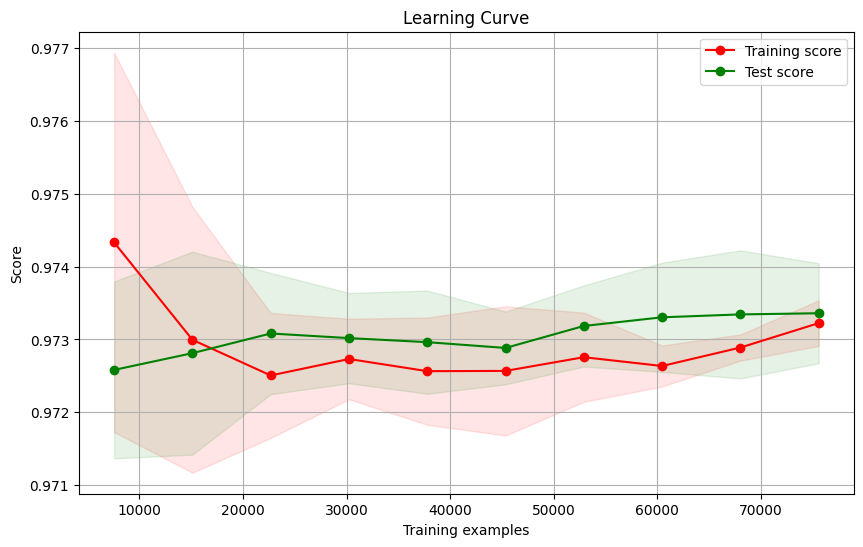

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.25)
def plot_learning_curve(estimator1, X_temp, y_temp, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(estimator1,X_temp, y_temp, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

    plt.title('Learning Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Definir el modelo
estimator1 = LogisticRegression()
# Trazar la curva de aprendizaje
plot_learning_curve(estimator1, X_temp, y_temp, scoring='accuracy')

# **Clasificación instrusos (Alto, Medio, Bajo)**

In [ ]:
X_test.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate,dst_host_srv_serror_rate,duration,hot,is_guest_login,is_host_login,land,logged_in,num_access_files,num_compromised,num_failed_logins,num_file_creations,num_outbound_cmds,num_root,num_shells,rerror_rate,root_shell,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,su_attempted,urgent,wrong_fragment,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
378,-0.717045,-0.349683,-0.004919,-1.160708,-0.439078,-0.387635,2.756092,1.066401,-0.639532,0.499962,-0.200265,-0.376387,-0.624871,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,0.771283,-0.637209,-0.007756,-0.326808,2.511949,-0.374432,-0.631929,-0.024437,-0.007736,-0.089486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32038,-0.367725,0.204906,-0.004919,0.734343,-0.174417,-0.387635,-0.447834,-0.782367,1.608759,-0.647258,-0.289103,-0.376387,1.618955,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-0.911985,1.602664,-0.007762,-0.230437,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86399,1.745661,-0.016930,-0.004919,0.734343,-0.121485,-0.387635,-0.480197,-0.982836,1.608759,-0.864056,-0.289103,-0.376387,1.618955,-0.110249,-0.095076,-0.097531,-0.002817,-0.014089,-0.809262,-0.041221,-0.011664,-0.027023,-0.02618,0.0,-0.012385,-0.01861,-0.374362,-0.036652,-1.344175,1.602664,-0.007762,-0.106530,-0.374560,-0.374432,1.605104,-0.024437,-0.007736,-0.089486,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
74412,0.226119,-0.016930,-0.004919,0.734343,-0.068553,2.874410,-0.480197,-0.916013,-0.639532,-0.800824,-0.289103,2.

In [ ]:
len(X_test)

25195

In [ ]:
# 1. Obtener probabilidades del modelo
estimator1.fit(X_temp, y_temp)
prob_pos = estimator1.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


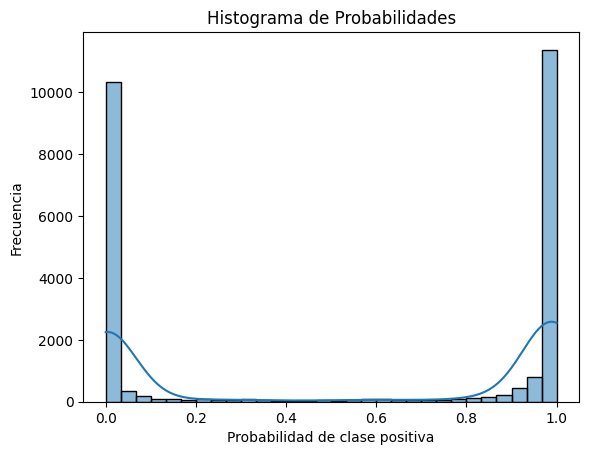

In [ ]:
# 2. Visualizamos histograma de probabilidadaes

df_prob = pd.DataFrame({'probabilidad': prob_pos})

sns.histplot(df_prob['probabilidad'], bins=30, kde=True)
plt.title('Histograma de Probabilidades')
plt.xlabel('Probabilidad de clase positiva')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_prob.head()

,probabilidad
0,0.993005
1,0.001075
2,0.000118
3,0.001669
4,0.000005


In [ ]:
df_prob['clasificacion'] = pd.cut(
    df_prob['probabilidad'],
    bins=[0.0, 0.33, 0.66, 1.0],
    labels=['bajo', 'medio', 'alto']
)

In [ ]:
df_prob.sort_values(by='probabilidad', ascending=False, inplace=True)
df_prob

,probabilidad,clasificacion
11636,1.000000e+00,alto
22291,1.000000e+00,alto
25018,1.000000e+00,alto
2137,1.000000e+00,alto
781,1.000000e+00,alto
...,...,...
10431,2.618102e-12,bajo
14791,2.522116e-12,bajo
2124,2.473762e-12,bajo
17486,2.325568e-12,bajo


In [ ]:
df_prob['clasificacion'].value_counts()

,count
clasificacion,
alto,13330
bajo,11373
medio,492


In [ ]:
tabla_clasificacion = pd.DataFrame({
    'Frecuencia': df_prob['clasificacion'].value_counts(),
    'Porcentaje (%)': (df_prob['clasificacion'].value_counts(normalize=True)* 100).round(1)
})

tabla_clasificacion

,Frecuencia,Porcentaje (%)
clasificacion,,
alto,13330,52.9
bajo,11373,45.1
medio,492,2.0


<ipython-input-104-22483465af37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_prob['clasificacion'], palette='Set2')


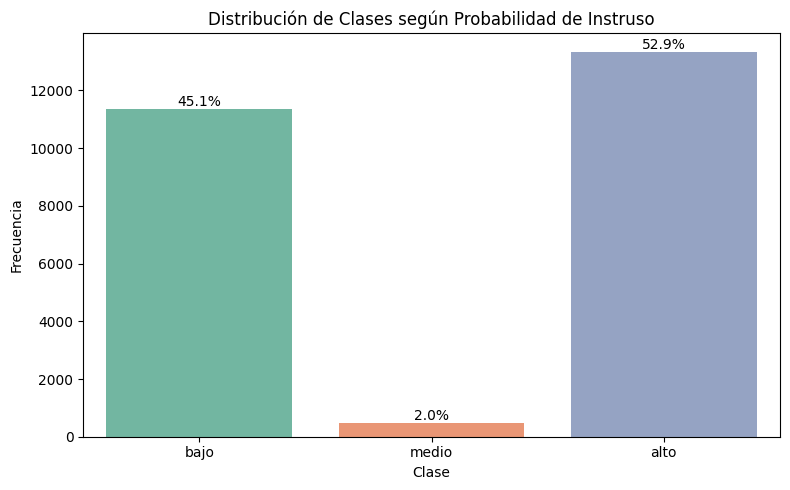

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df_prob['clasificacion'], palette='Set2')
plt.title('Distribución de Clases según Probabilidad de Instruso')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

# Mostrar porcentajes encima de las barras
total = len(df_prob['clasificacion'])
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(porcentaje, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Recomendaciones**


1.   Elemento de lista
2.   Elemento de lista

